In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import gym, action_only

class GreedyActionOnlySolver:
    def __init__(self, k = 10, maxT = 1000, explore = 0.0):
        self.k = k
        self.maxT = maxT
        self.explore = explore
        
        self.q = np.random.normal(0,1,self.k)
        self.count = np.zeros(self.k)
        
    def choose_action(self, state):
        r = np.random.uniform()
        #print(self.q)
        return np.random.randint(0, self.k) if r < self.explore else np.argmax(self.q)
    
    def update(self, state, action, next_state, reward, done ):
        n = self.count[action]+1
        self.q[action] += 1.0 / n * (reward - self.q[action])
        self.count[action] = n
        
    def run(self):
        env = gym.make('action-only-v0')
        state = env.reset()
        self.rewards = []
        for t in range(self.maxT):
            action = self.choose_action(state)
            ob, reward, done,_ = env.step(action)
            self.update(state, action, ob, reward, done)
            self.rewards.append(reward)
            
            state = ob
            if done:
                break
        #print(agent.q, env.qstar, np.argmax(agent.q), np.argmax(env.qstar))
           
k = 10
maxT = 1000

ave = {}

for explore in [0, 0.01, 0.1]:
    ave_tmp = np.zeros(maxT)
    for i in range(2000):
        agent = GreedyActionOnlySolver(k, maxT, explore)
        agent.run()
        ave_tmp += 1.0/(i+1)*(agent.rewards-ave_tmp)
    ave[explore] = ave_tmp


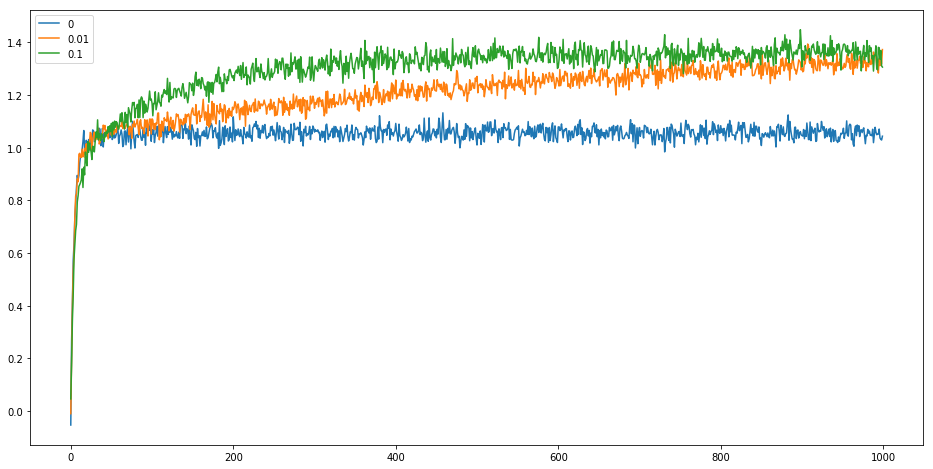

In [3]:
plt.figure(figsize=(16,8))
for e, a in ave.items():
    plt.plot(a, label=str(e))
plt.legend()
plt.show()